### Import the dataset (Twitter) checkout the column names and shape


In [1]:
import pandas as pd

df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv('dataset/test.csv')

df_train.shape, df_train.shape, df_train.columns
df_train.head()

,Unnamed: 0,tweet_id,sentiment,tweet
0,0,1213084822521950209,neutral,NaN
1,1,1213011490372038656,neutral,ልዩ የተፈጥሮ ገፅታ \n *****\n\nየምስራቅ አፍሪካ የውሃ ማማ ጮቄ
2,2,1213763702715043840,mixed,@AbbaSheger ማንም ቢሆን የሀገሩን ጥቅም አሳልፎ አይሰጥም። ያ መላ...
3,3,1213764224356421633,neutral,ብ/ጄ አሳምነው ጽጌ ከምክትል ጠ/ሚ ደመቀ ጋር በሱዳን ጉብኝት አልበሽር ...
4,4,1212766574337150976,positive,NaN


In [2]:
def clean_df(df):
    """removes null values and resets index"""
    # remove null values from dataset
    df = df.dropna()
    # drop repeated rows (drop rows with similar tweet id)
    df = df.drop_duplicates(subset='tweet_id', keep="first")
    df = df.reset_index(drop=True)
    return df


df_test = clean_df(df_test)
df_train = clean_df(df_train)

### Remove unnecessary columns


In [3]:
from sklearn.preprocessing import LabelEncoder

df_train.drop(["Unnamed: 0", "tweet_id"], inplace=True, axis=1)
df_test.drop(["Unnamed: 0", "tweet_id"], inplace=True, axis=1)

df_train['sentiment'] = df_train['sentiment'].astype('category')
df_test['sentiment'] = df_test['sentiment'].astype('category')

df_train['tweet'] = df_train['tweet'].astype('str')
df_test['tweet'] = df_test['tweet'].astype('str')

encoder = LabelEncoder()
df_train['sentiment_num'] = encoder.fit_transform(df_train['sentiment'])
df_test['sentiment_num'] = encoder.fit_transform(df_test['sentiment'])

## Character level normalization

since amharic many characters with the same sound we should make the data consistent


In [4]:
import re


def normalize_char_level_missmatch(input_token):
    rep1 = re.sub('[ሃኅኃሐሓኻ]', 'ሀ', input_token)
    rep2 = re.sub('[ሑኁዅ]', 'ሁ', rep1)
    rep3 = re.sub('[ኂሒኺ]', 'ሂ', rep2)
    rep4 = re.sub('[ኌሔዄ]', 'ሄ', rep3)
    rep5 = re.sub('[ሕኅ]', 'ህ', rep4)
    rep6 = re.sub('[ኆሖኾ]', 'ሆ', rep5)
    rep7 = re.sub('[ሠ]', 'ሰ', rep6)
    rep8 = re.sub('[ሡ]', 'ሱ', rep7)
    rep9 = re.sub('[ሢ]', 'ሲ', rep8)
    rep10 = re.sub('[ሣ]', 'ሳ', rep9)
    rep11 = re.sub('[ሤ]', 'ሴ', rep10)
    rep12 = re.sub('[ሥ]', 'ስ', rep11)
    rep13 = re.sub('[ሦ]', 'ሶ', rep12)
    rep14 = re.sub('[ዓኣዐ]', 'አ', rep13)
    rep15 = re.sub('[ዑ]', 'ኡ', rep14)
    rep16 = re.sub('[ዒ]', 'ኢ', rep15)
    rep17 = re.sub('[ዔ]', 'ኤ', rep16)
    rep18 = re.sub('[ዕ]', 'እ', rep17)
    rep19 = re.sub('[ዖ]', 'ኦ', rep18)
    rep20 = re.sub('[ጸ]', 'ፀ', rep19)
    rep21 = re.sub('[ጹ]', 'ፁ', rep20)
    rep22 = re.sub('[ጺ]', 'ፂ', rep21)
    rep23 = re.sub('[ጻ]', 'ፃ', rep22)
    rep24 = re.sub('[ጼ]', 'ፄ', rep23)
    rep25 = re.sub('[ጽ]', 'ፅ', rep24)
    rep26 = re.sub('[ጾ]', 'ፆ', rep25)
    # Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል
    rep27 = re.sub('(ሉ[ዋአ])', 'ሏ', rep26)
    rep28 = re.sub('(ሙ[ዋአ])', 'ሟ', rep27)
    rep29 = re.sub('(ቱ[ዋአ])', 'ቷ', rep28)
    rep30 = re.sub('(ሩ[ዋአ])', 'ሯ', rep29)
    rep31 = re.sub('(ሱ[ዋአ])', 'ሷ', rep30)
    rep32 = re.sub('(ሹ[ዋአ])', 'ሿ', rep31)
    rep33 = re.sub('(ቁ[ዋአ])', 'ቋ', rep32)
    rep34 = re.sub('(ቡ[ዋአ])', 'ቧ', rep33)
    rep35 = re.sub('(ቹ[ዋአ])', 'ቿ', rep34)
    rep36 = re.sub('(ሁ[ዋአ])', 'ኋ', rep35)
    rep37 = re.sub('(ኑ[ዋአ])', 'ኗ', rep36)
    rep38 = re.sub('(ኙ[ዋአ])', 'ኟ', rep37)
    rep39 = re.sub('(ኩ[ዋአ])', 'ኳ', rep38)
    rep40 = re.sub('(ዙ[ዋአ])', 'ዟ', rep39)
    rep41 = re.sub('(ጉ[ዋአ])', 'ጓ', rep40)
    rep42 = re.sub('(ደ[ዋአ])', 'ዷ', rep41)
    rep43 = re.sub('(ጡ[ዋአ])', 'ጧ', rep42)
    rep44 = re.sub('(ጩ[ዋአ])', 'ጯ', rep43)
    rep45 = re.sub('(ጹ[ዋአ])', 'ጿ', rep44)
    rep46 = re.sub('(ፉ[ዋአ])', 'ፏ', rep45)
    rep47 = re.sub('[ቊ]', 'ቁ', rep46)  # ቁ can be written as ቊ
    rep48 = re.sub('[ኵ]', 'ኩ', rep47)  # ኩ can be also written as ኵ
    return rep48


df_test['tweet'] = df_test['tweet'].apply(
    lambda x: normalize_char_level_missmatch(x))
df_train['tweet'] = df_train['tweet'].apply(
    lambda x: normalize_char_level_missmatch(x))

## Remove unnecessary symbols and emojis


In [5]:
def clean_text(row, options):
    """Removes url, mentions, emoji and uppercase from tweets"""

    if options['remove_url']:
        row = re.sub(r"(?:\@|https?\://)\S+", "", row)

    if options['remove_mentions']:
        row = re.sub("@[A-Za-z0-9_]+", "", row)

    if options['demojify']:
        emoj = re.compile("["
                          u"\U00000021-\U000000BB"
                          u"\U00001361-\U000020AC"  # amharic symbols
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002500-\U00002BEF"  # chinese char
                          u"\U00002702-\U000027B0"
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          u"\U0001f926-\U0001f937"
                          u"\U00010000-\U0010ffff"

                          u"\u2640-\u2642"
                          u"\u2600-\u2B55"
                          u"\u200d"
                          u"\u23cf"
                          u"\u23e9"
                          u"\u231a"
                          u"\ufe0f"  # dingbats
                          u"\u3030"
                          "]+", re.UNICODE)
        row = re.sub(emoj, '', row)

    return row


clean_config = {
    'remove_url': True,
    'remove_mentions': True,
    'demojify': True
}

df_test['tweet'] = df_test['tweet'].apply(
    clean_text, args=(clean_config,))
df_train['tweet'] = df_train['tweet'].apply(
    clean_text, args=(clean_config,))

## Model 1 - Neural Networks


Extract the tokens from the dataset


In [6]:
import tensorflow as tf

tokenizer_train = tf.keras.preprocessing.text.Tokenizer()
tokenizer_train.fit_on_texts(df_train['tweet'])
word_index_train = tokenizer_train.word_index

tokenizer_test = tf.keras.preprocessing.text.Tokenizer()
tokenizer_test.fit_on_texts(df_test['tweet'])
word_index_test = tokenizer_test.word_index

word_index_train

2024-06-03 13:30:15.630725: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 13:30:15.643607: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 13:30:15.832029: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 13:30:19.741242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


{'ነው': 1,
 'ላይ': 2,
 'እና': 3,
 'ግን': 4,
 'ሰው': 5,
 'ምን': 6,
 'ነገር': 7,
 'ብቻ': 8,
 'ነበር': 9,
 'ጋር': 10,
 'ወደ': 11,
 'ውስጥ': 12,
 'ህዝብ': 13,
 'አይደለም': 14,
 'አሁን': 15,
 'ያለው': 16,
 'እንኳን': 17,
 'አንድ': 18,
 'እኔ': 19,
 'መንግስት': 20,
 'እንጂ': 21,
 'እንደ': 22,
 'እኮ': 23,
 'በጣም': 24,
 'ነዉ': 25,
 'ሁሉ': 26,
 'አዲስ': 27,
 'ደግሞ': 28,
 'ማለት': 29,
 'አመት': 30,
 'ዛሬ': 31,
 'ቤት': 32,
 'መልካም': 33,
 'ኢትዮጵያ': 34,
 'ጊዜ': 35,
 'ብሎ': 36,
 'እንዴት': 37,
 'ክልል': 38,
 'የኢትዮጵያ': 39,
 'ፓርቲ': 40,
 'አንተ': 41,
 'ሀገር': 42,
 'ጥሩ': 43,
 'እንዴ': 44,
 'ሰዎች': 45,
 'ይህ': 46,
 'ሰላም': 47,
 'ቀን': 48,
 'አበባ': 49,
 'ለምን': 50,
 'ምንም': 51,
 'ስራ': 52,
 'አለ': 53,
 'ናቸው': 54,
 'ብዙ': 55,
 'ብልፅግና': 56,
 'አብይ': 57,
 'ሳይሆን': 58,
 'ስለ': 59,
 'የለም': 60,
 'ነኝ': 61,
 'ከ': 62,
 'እውነት': 63,
 'በላይ': 64,
 'አማራ': 65,
 'ከተማ': 66,
 'ይሄ': 67,
 'አይነት': 68,
 'እንዲህ': 69,
 'የ': 70,
 'ችግር': 71,
 'ልጅ': 72,
 'እኛ': 73,
 'በ': 74,
 'ነህ': 75,
 'እግዚአብሄር': 76,
 'አቶ': 77,
 'ጉዳይ': 78,
 'ጥያቄ': 79,
 'ደሞ': 80,
 'የሚል': 81,
 'ምርጫ': 82,
 'የአማራ': 83,
 'አሜን': 84,
 'ይህን': 85,
 'ሀ

- Represent the string in numbers
- Append 0s to the short strings to make them consistent


In [7]:
sequences_train = tokenizer_train.texts_to_sequences(df_train['tweet'])
padded_train = tf.keras.preprocessing.sequence.pad_sequences(
    sequences_train, padding='post', maxlen=100)

sequences_test = tokenizer_test.texts_to_sequences(df_test['tweet'])
padded_test = tf.keras.preprocessing.sequence.pad_sequences(
    sequences_test, padding='post', maxlen=100)

padded_train

array([[  177,  1446,  1684, ...,     0,     0,     0],
       [  178,   120,  2366, ...,     0,     0,     0],
       [10012,  1685,  1277, ...,     0,     0,     0],
       ...,
       [  235, 34059,   259, ...,     0,     0,     0],
       [34066,   276, 34067, ...,     0,     0,     0],
       [ 8536,   862, 34076, ...,     0,     0,     0]], dtype=int32)

In [8]:
padded_train.shape, padded_test.shape

((6274, 100), (552, 100))

model creation


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [10]:
model.compile(
    loss=tf.losses.categorical_crossentropy,
    optimizer=tf.optimizers.SGD(),
    metrics=['accuracy']
)

In [11]:
model.fit(padded_train, df_train['sentiment_num'], epochs=50, validation_data=(
    padded_test, df_test['sentiment_num']))

Epoch 1/50


/home/ashenafi/dev/timelessapps/amharic-sentiment-analysis/venv/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/home/ashenafi/dev/timelessapps/amharic-sentiment-analysis/venv/lib/python3.12/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1024 - loss: nan - val_accuracy: 0.0906 - val_loss: nan
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0788 - loss: nan - val_accuracy: 0.0906 - val_loss: nan
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0830 - loss: nan - val_accuracy: 0.0906 - val_loss: nan
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0816 - loss: nan - val_accuracy: 0.0906 - val_loss: nan
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0733 - loss: nan - val_accuracy: 0.0906 - val_loss: nan
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0850 - loss: nan - val_accuracy: 0.0906 - val_loss: nan
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0763 - loss: nan - val_accuracy: 0.0906 - val_loss: nan
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0798 - loss: nan - val_accuracy: 0.0906 - val_loss: nan
Epoch 9/50
197/197 ━━━━━━━━━━━━━━━━

## Model 2 - Naive Bayes


In [12]:
from sklearn.naive_bayes import GaussianNB
import joblib
nb_model = GaussianNB()

nb_model.fit(padded_train, df_train['sentiment_num'])

joblib.dump(nb_model, "nb_model.pkl")

['nb_model.pkl']

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

predictions = nb_model.predict(padded_test)
# print(predictions)
accuracy_score(df_test['sentiment_num'], predictions), confusion_matrix(
    df_test['sentiment_num'], predictions)

(0.09239130434782608,
 array([[ 50,   0,   0,   0],
        [141,   0,   0,   0],
        [245,   0,   0,   1],
        [114,   0,   0,   1]]))

## Model 3 - SVM


In [14]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(padded_train, df_train['sentiment_num'])

SVC()

In [15]:
predictions = svm_model.predict(padded_test)
accuracy_score(df_test['sentiment_num'], predictions), confusion_matrix(
    df_test['sentiment_num'], predictions)

(0.44565217391304346,
 array([[  0,   0,  50,   0],
        [  0,   0, 141,   0],
        [  0,   0, 246,   0],
        [  0,   0, 115,   0]]))

## Export the model for external use


In [16]:
from joblib import Parallel, delayed
import joblib
import numpy as np

joblib.dump(svm_model, "svm_model.pkl")

['svm_model.pkl']

In [17]:
text = "@Tseday 😂😂😂😂  እንደዚ ዓይነት ተረት ተረት እስከ ኣሁን ኣለ እንዴ በኢትዮጵያ! ያሳፍራል በጣም::"
output = {
    0: "mixed",
    1: "negative",
    2: "neutral",
    3: "positive"
}

# model = joblib.load("svm_model.pkl")
# model
text = normalize_char_level_missmatch(text)
# text
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=100, oov_token='<OOV>')

tokenizer.fit_on_texts([text])

# tokenizer.index_word

sequences = tokenizer.texts_to_sequences([text])

# sequences

padded = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, padding='post', maxlen=100)
padded
dy = np.array([[2, 23, 0, 0, 0, 0, 0, 23, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 3, 0, 0, 0, 0, 67, 0, 0, 0, 0, 0, 2, 3, 26, 3, 2, 3, 2, 3, 3,
                0, 0, 0, 56, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 2, 3, 2, 3, 2, 3, 2, 3, 3, 0, 0, 0, 0, 0,  56, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 3, 0, 0, 0]])

output[svm_model.predict(dy)[0]]

'neutral'

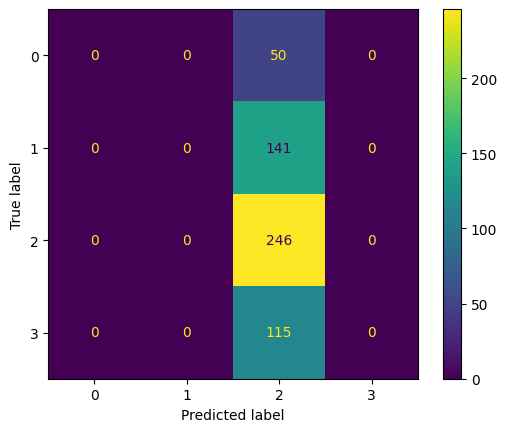

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df_test["sentiment_num"], predictions)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()